## Loading the Dataset

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

In [2]:
data = np.loadtxt('../Dataset/wine.data', delimiter=',')
# Names of features
featurenames = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 'Proline']

## Creating Test Set and  Training Set

There are 178 data points, each with 13 features and a label (1,2,3).
We will divide these into a training set of 130 points and a test set of 48 points.

In [3]:
np.random.seed(0)
perm = np.random.permutation(178)
trainx = data[perm[0:130],1:14]
trainy = data[perm[0:130],0]
testx = data[perm[130:178], 1:14]
testy = data[perm[130:178],0]

## Generative Model

In [4]:
def fit_generative_model(x,y,feature):
    k = 3 # number of classes
    mu = np.zeros(k+1) # list of means
    var = np.zeros(k+1) # list of variances
    pi = np.zeros(k+1) # list of class weights
    for label in range(1,k+1):
        indices = (y==label)
        mu[label] = np.mean(x[indices,feature])
        var[label] = np.var(x[indices,feature])
        pi[label] = float(sum(indices))/float(len(y))
    return mu, var, pi

## Plotting of all three wineries

In [5]:
def show_densities(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)
    colors = ['r', 'k', 'g']
    for label in range(1,4):
        m = mu[label]
        s = np.sqrt(var[label])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis,m,s), colors[label-1], label="class " + str(label))
    plt.xlabel(featurenames[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show()

## Label Prediction

In [6]:
def test_model(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)

    k = 3 # Labels 1,2,...,k
    n_test = len(testy) # Number of test points
    score = np.zeros((n_test,k+1))
    for i in range(0,n_test):
        for label in range(1,k+1):
            score[i,label] = np.log(pi[label]) + \
            norm.logpdf(testx[i,feature], mu[label], np.sqrt(var[label]))
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    print("Test error using feature " + featurenames[feature] + ": " + str(errors) + "/" + str(n_test))
    return(errors)

In [7]:
error=[]
for i in range(13):
    error.append(test_model(i))

Test error using feature Alcohol: 17/48
Test error using feature Malic acid: 23/48
Test error using feature Ash: 29/48
Test error using feature Alcalinity of ash: 23/48
Test error using feature Magnesium: 21/48
Test error using feature Total phenols: 16/48
Test error using feature Flavanoids: 8/48
Test error using feature Nonflavanoid phenols: 23/48
Test error using feature Proanthocyanins: 16/48
Test error using feature Color intensity: 10/48
Test error using feature Hue: 14/48
Test error using feature OD280/OD315 of diluted wines: 19/48
Test error using feature Proline: 17/48


## Plotting features with least errors

In [8]:
least_error=np.argsort(error)[:5]

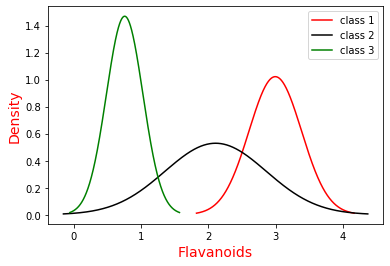

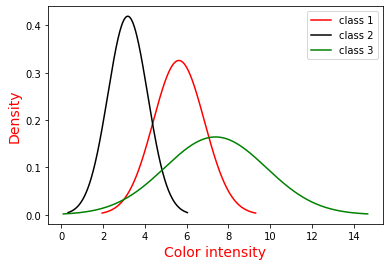

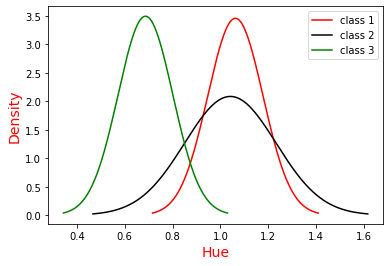

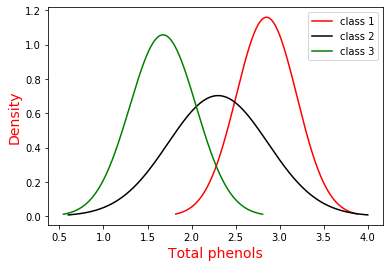

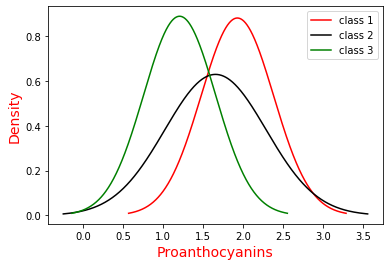

In [9]:
for i in range(len(least_error)):
    show_densities(least_error[i])